In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [93]:
austinZipCodes = pd.read_csv('AustinZipCodes.csv')
austinCrime = pd.read_csv('crime-housing-austin-2015.csv')

## Analysis of Correlation between Unemployment, Poverty, and Crime

# Statistics of Unemployment, Poverty, and Crime by Zip Code

In [94]:
# Verifying Correlation between Poverty % and Unemployment %
allCrimes = austinCrime[["Key", "Zip_Code_Crime"]]
allZipCrimes = allCrimes.groupby(by=['Zip_Code_Crime']).count().reset_index()
countyStats = austinCrime.drop_duplicates(subset=["Zip_Code_Crime"])
countyStats = countyStats[["Zip_Code_Crime", "Populationbelowpovertylevel", "Unemployment"]].dropna()
countyStats = countyStats.join(allZipCrimes.set_index("Zip_Code_Crime"), on="Zip_Code_Crime")

In [95]:
countyStats['Populationbelowpovertylevel'] = countyStats['Populationbelowpovertylevel'].str.replace('%','').astype('float')
countyStats['Unemployment'] = countyStats['Unemployment'].str.replace('%','').astype('float')
countyStats = countyStats.sort_values(by="Populationbelowpovertylevel")
countyStats.columns = "Zip Code", "Pop. in Poverty %", "Unemployment %", "Total Crimes"
display(countyStats)

,Zip Code,Pop. in Poverty %,Unemployment %,Total Crimes
1334,78739.0,1.0,4.0,185
204,78717.0,3.0,5.0,237
1587,78732.0,3.0,5.0,1
694,78730.0,4.0,3.0,47
74,78746.0,5.0,4.0,812
663,78735.0,6.0,4.0,298
126,78749.0,6.0,4.0,845
11,78759.0,7.0,7.0,1403
211,78750.0,7.0,6.0,419
55,78729.0,8.0,7.0,493


# Correlation of Poverty and Unemployment

r = 0.7577349737606816, p = 8.751651662870416e-08


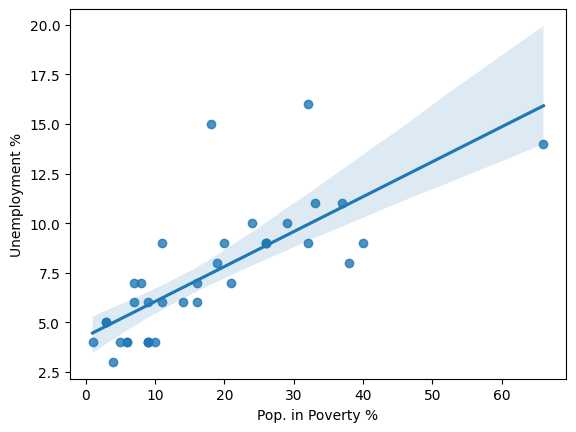

In [ ]:
# Verifying Correlation between Poverty % and Unemployment %
sns.regplot(data=countyStats, x="Pop. in Poverty %", y="Unemployment %")
(r, p) = stats.pearsonr(countyStats["Pop. in Poverty %"], countyStats["Unemployment %"]) 
print("r = " + str(r) + ", p = " + str(p))
plt.savefig("UnemploymentPovertyCorrelation.pdf")

# Correlation of Crime and Poverty

In [ ]:
# Verifying Correlation between Poverty % and Total Crimes
sns.regplot(data=countyStats, x="Total Crimes", y="Pop. in Poverty %")
(r, p) = stats.pearsonr(countyStats["Total Crimes"], countyStats["Pop. in Poverty %"]) 
print("r = " + str(r) + ", p = " + str(p))
plt.savefig("TotalCrimesPovertyCorrelation.pdf")

# Correlation of Crime and Unemployment

In [ ]:
# Verifying Correlation between Unemployment % and Total Crimes
sns.regplot(data=countyStats, x="Total Crimes", y="Unemployment %")
(r, p) = stats.pearsonr(countyStats["Total Crimes"], countyStats["Unemployment %"]) 
print("r = " + str(r) + ", p = " + str(p))
plt.savefig("TotalCrimesUnemploymentCorrelation.pdf")